Trecho de código de bibliotecas

In [1]:
install.packages("gridExtra")
#install.packages("repr")
#install.packages("ggplot2")
#install.packages("tidyverse") 
#install.packages("repr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)




Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Trecho de código de leitura dos dados:

In [3]:
tsDia1=as.data.frame(read.table("../ESC/150-2100/dias/dia2.txt"))
names(tsDia1)=c("Dia1")
kalman=as.data.frame(read.table("../ESC/150-2100/resultados/df_kalmanSmoothing.txt"))
inter=as.data.frame(read.table("../ESC/150-2100/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../ESC/150-2100/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../ESC/150-2100/resultados/df_mean.txt"))
median=as.data.frame(read.table("../ESC/150-2100/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../ESC/150-2100/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../ESC/150-2100/resultados/df_stine_interpolation.txt"))
names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")

Trecho de código de funções de tratamento

In [5]:
#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaQuartis <- function(data_vector, metrica, quartil){
    tst=data_vector %>% select(metrica)
    mediaLac=c()
    media=c()
    for(z in seq(1,40,1)){
        for (i in seq(z,3600,120)){
            if(quartil==1){
                mediaLac=append(mediaLac, tst[i,])
            } else if(quartil==2){
                mediaLac=append(mediaLac, tst[i+40,])

            }else if(quartil==3){
                mediaLac=append(mediaLac, tst[i+80,])
            }
        }
    }
      for (i in seq(1,1200,30)) {
          media=append(media,(mean(mediaLac[i:(i+29)])))
      }   
    return (media)
}


Trecho de código de construção dos dataframes dos quartis:

In [6]:
tamanhoGap= seq(150,2100,50) 
quartisSti=as.data.frame(mediaQuartis(sti, "rmse", 1))
names(quartisSti)=c("q2")
quartisSti$q3=mediaQuartis(sti, "rmse", 2)
quartisSti$q4=mediaQuartis(sti, "rmse", 3)
quartisSti$tamanho=tamanhoGap
quartisSti$Algoritmo="Stine"

quartisInter=as.data.frame(mediaQuartis(inter, "rmse", 1))
names(quartisInter)=c("q2")
quartisInter$q3=mediaQuartis(inter, "rmse", 2)
quartisInter$q4=mediaQuartis(inter, "rmse", 3)
quartisInter$tamanho=tamanhoGap
quartisInter$Algoritmo="Interpolation"

quartisKal=as.data.frame(mediaQuartis(kalman, "rmse", 1))
names(quartisKal)=c("q2")
quartisKal$q3=mediaQuartis(kalman, "rmse", 2)
quartisKal$q4=mediaQuartis(kalman, "rmse", 3)
quartisKal$tamanho=tamanhoGap
quartisKal$Algoritmo="Kalman"

quartisLocf=as.data.frame(mediaQuartis(locf, "rmse", 1))
names(quartisLocf)=c("q2")
quartisLocf$q3=mediaQuartis(locf, "rmse", 2)
quartisLocf$q4=mediaQuartis(locf, "rmse", 3)
quartisLocf$tamanho=tamanhoGap
quartisLocf$Algoritmo="Locf"

quartisMean=as.data.frame(mediaQuartis(mean, "rmse", 1))
names(quartisMean)=c("q2")
quartisMean$q3=mediaQuartis(mean, "rmse", 2)
quartisMean$q4=mediaQuartis(mean, "rmse", 3)
quartisMean$tamanho=tamanhoGap
quartisMean$Algoritmo="Mean"

quartisMedian=as.data.frame(mediaQuartis(median, "rmse", 1))
names(quartisMedian)=c("q2")
quartisMedian$q3=mediaQuartis(median, "rmse", 2)
quartisMedian$q4=mediaQuartis(median, "rmse", 3)
quartisMedian$tamanho=tamanhoGap
quartisMedian$Algoritmo="Median"

quartisMalExp=as.data.frame(mediaQuartis(malExp, "rmse", 1))
names(quartisMalExp)=c("q2")
quartisMalExp$q3=mediaQuartis(malExp, "rmse", 2)
quartisMalExp$q4=mediaQuartis(malExp, "rmse", 3)
quartisMalExp$tamanho=tamanhoGap
quartisMalExp$Algoritmo="EMA"

quartisMalLin=as.data.frame(mediaQuartis(malLin, "rmse", 1))
names(quartisMalLin)=c("q2")
quartisMalLin$q3=mediaQuartis(malLin, "rmse", 2)
quartisMalLin$q4=mediaQuartis(malLin, "rmse", 3)
quartisMalLin$tamanho=tamanhoGap
quartisMalLin$Algoritmo="LMA"

quartisMalSim=as.data.frame(mediaQuartis(malSim, "rmse", 1))
names(quartisMalSim)=c("q2")
quartisMalSim$q3=mediaQuartis(malSim, "rmse", 2)
quartisMalSim$q4=mediaQuartis(malSim, "rmse", 3)
quartisMalSim$tamanho=tamanhoGap
quartisMalSim$Algoritmo="SMA"

quartisSpl=as.data.frame(mediaQuartis(spl, "rmse", 1))
names(quartisSpl)=c("q2")
quartisSpl$q3=mediaQuartis(spl, "rmse", 2)
quartisSpl$q4=mediaQuartis(spl, "rmse", 3)
quartisSpl$tamanho=tamanhoGap
quartisSpl$Algoritmo="Spline"
todosQuartis=rbind(quartisInter, quartisKal, quartisLocf, quartisMean, quartisMedian, quartisMalExp, quartisMalSim, quartisMalLin, quartisSpl,quartisSti)

Contextualização
===
As Smart Grids oferecem um modelo de gestão eficiente das redes de transmissão, reduzindo perdas e congestionamento de carga, melhorando a confiabilidade da rede elétrica. Tais sistemas possuem a capacidade de introduzir o fornecimento de energia renovável a partir dos consumidores, permitindo que o fluxo de dados e de energia ocorra de forma bidirecional. Devido a esse comportamento, surgiram os sistemas inteligentes de leitura, chamados de Smart Meters. Esse dispositivo coleta automaticamente os dados de energia e transfere a informação para um sistema centralizado para o processamento posterior. Entretanto, mesmo no cenário de Smart Grids existe a possibilidade de ocorrerem problemas de perda ou leitura incorreta dos dados nos Smart Meters, devido a fraudes ou falhas no processo de transmissão e medição, de maneira que dados corrompidos ou faltantes são medidos e transmitidos à central, localizada geralmente em data-centers na Cloud. Dados ausentes geram  inconsistências e diminuição da qualidade de serviço. Dessa forma, este projeto propõe a utilização de uma arquitetura de orquestração de recursos computacionais na Fog, que seja capaz de oferecer uma maior agilidade no tratamento de possíveis dados ausentes por meio da virtualização de gateways leves baseada em containers. A ideia é realizar a orquestração de recursos computacionais responsáveis pela análise de séries temporais e imputação antecipada de dados faltantes, absorvendo a carga de trabalho de processamento de dados, tornando que sejam possíveis tomadas de decisão em tempo real para o controle de demanda e consumo feito por Smart Meters, e posteriormente tomadas de decisão a longo prazo feitas pela Cloud.

Imputação de dados faltantes
=======
A perda de dados é um importante problema em diversas áreas do conhecimento. Os dados podem ser perdidos devido ao mal funcionamento do equipamento de coleta, entrada incorreta dos dados ou quando o valor relatado está longe do intervalo esperado, tornando-o inválido. Nesses cenários, o valor relatado não é o real e o valor é considerado um valor ausente, dessa forma, valores ausentes podem levar a problemas, porque muitas vezes outras etapas de processamento e análise de dados dependem de conjuntos de dados completos. 
\cite{BROERSEN2006, Majidpour2014, Moritz2015}.

O processo de fornecer o melhor palpite para os dados faltantes é chamado de imputação. Muitos estudos já foram feitos no campo da imputação de dados e é um área bastante consolidada na estatística, principalmente com algoritmos de imputação multi-variados, que são algoritmos que fazem correlações entre atributos para fazerem estimações mais precisas. Bons exemplos são os métodos de Multiple Imputation (Rubin, 1987), Expectation-Maximization (Dempster et al., 1977), Nearest Neighbor (Vacek e Ashikaga, 1980) e HotDeck (Ford, 1983). Pelo fato de se tratar de uma sequência de observações únicas $\sigma_1, \sigma_2 \sigma_3$, ... em pontos sucessivos $t_1, t_2, t_3, ... t_n$ no tempo, o campo de imputação de dados em série temporais univariadas é ainda um grande desafio, pois nenhum atributo adicional pode ser empregado diretamente para fazer estimações, dificultando bastante esse trabalho. PAra que os algoritmos univariados sejam eficazes, é necessario utilizar características de séries temporais, tais quais 
\cite{Moritz2015}.
que em algoritmos de imputação multi-variados são necessários as correlações entre atributos para serem feitas as estimações mais precisas. No caso dos algoritmos univariados em séries temporais, apenas os dados históricos da série está disponível para fazer estimações. É por isso que é sensato tratar séries temporais univariadas de maneira diferente e usar algoritmos de imputação especialmente adaptados às suas características \cite{Moritz2015}. 


Algoritmos para a Imputação de Dados
===
Last observation carried forward LOCF
---
O método Last observation carried forward - (LOCF), é uma das alternativas simples e ingênuas para reparar lacunas existentes em conjuntos de dados, já que este consiste no uso do o último valor não ausente observado para preencher os valores ausentes em um momento posterior do estudo. Portanto, faz-se a suposição de que um valor permanece constante  até o próximo valor não ausente observado. 

Spline
---
A interpolação cúbica Spline é um método geralmente utilizado como uma alternativa aos métodos de aprendizado de máquina \cite{richardson2015cubic} e no processamento de sinais temporais  \cite{hussain2015interpolation}. Essa técnica consiste em analisar um conjunto de dados $A = \{a_1, a_2, a_3, \ldots, a_{n - 1}, a_n\}$  que tem seus pontos gerados por uma regra $g(\cdot)$ desconhecida. O algoritmo tenta, então, estimar uma função $g'(\cdot)$ para a qual $g(a) = g'(a), \forall a \in A$.

Desta forma, para se definir $g'(\cdot)$ é utilizado um polinômio de grau 3 para cada intervalo entre observações. Ou seja, uma spline $S(x)$ é definida por:

\begin{equation} \label{eq:1}
S3(x) = \left\{ \begin{array}{ll}
 C_{0}(x), & \textrm{$x_{0} \leq x \leq x_{1}$}\\
 C_{i}(x), & \textrm{$x_{i-1} \leq x \leq x_{i}$}\\
 C_{n}(x), & \textrm{$x_{n-1} \leq x \leq x_{n}$}
\end{array}\right.
\end{equation}
Onde cada função $C_i(\cdot)$ é definida sobre a forma de $C_i(x) = a + bx + cx^2 + dx^3$ e deve passar pelas observações de forma que $C_i = a_i$ tal que $1 \leq i \leq n$. 


 A seguir, são explicadas as diferentes características das séries temporais.


Objetivo
====
O Objetivo desses experimentos é verificar a capacidade de imputação de dados dos algoritmos da biblioteca ImputeTS  \cite{MoritzBartz-Beielstein2017} por meio das medidas de erro RMSE, MSE e MAE. 

DataSets
===
Os conjuntos de dados desse projeto foram obtidos por meio de medições de tensão/corrente através de dois Smart Meters open hardware e open source de baixo custo, que são o ÉdaSuaConta e o IoTaWatt residências em Vitória da Conquista e na cidade de Lile. 

Os dados que compõem as séries temporais, foram obtidos a partir do banco de dados da leitura do consumo em Watts do IoTaWatt e o ÉdaSuaConta. As amostras de tensão e corrente foram lidas a cada segundo, sendo somadas e salvas no banco de dados a cada 10 segundos. Dessa forma, os dados da 00h do dia 1º de Agosto de 2017 até às 23:59 do dia 30 deste mesmo mês, foram utilizados como as séries temporais a serem analisadas, com um total de 259.200 dados de leituras de cada fonte de dados. As figuras 1 e 2 mostram a disposição da série temporal das leituras do conjunto de dados de leitura de cada um dos 10 segundos do mês das residências que utilizaram o ÉdaSuaConta e IoTaWatt.


Objetivo
====
O Objetivo desses experimentos é verificar a capacidade de imputação de dados dos algoritmos da biblioteca ImputeTS escrita por XXX por meio das medidas de erro RMSE, MSE e MAE. 


RMSE =$\sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big({d_i -f_i}\Big)^2}}$

MAE=$\frac{1}{n}\Sigma_{i=1}^{n} |{d_i -f_i}|$
 

Divisão da série temporal
===
Inicialmente as series temporais dos dias foram divididas em quatro partes iguais. 
O primeiro quartil é utilizado como histórico para os métodos que necessitam informações históricas para fazer a imputação de dados, os outros quartis são utilizados para fazer os experimentos, os quais são colocados valores NA's para simular lacunas contínuas a partir dos pontos 2160, 4320 e 6480. 

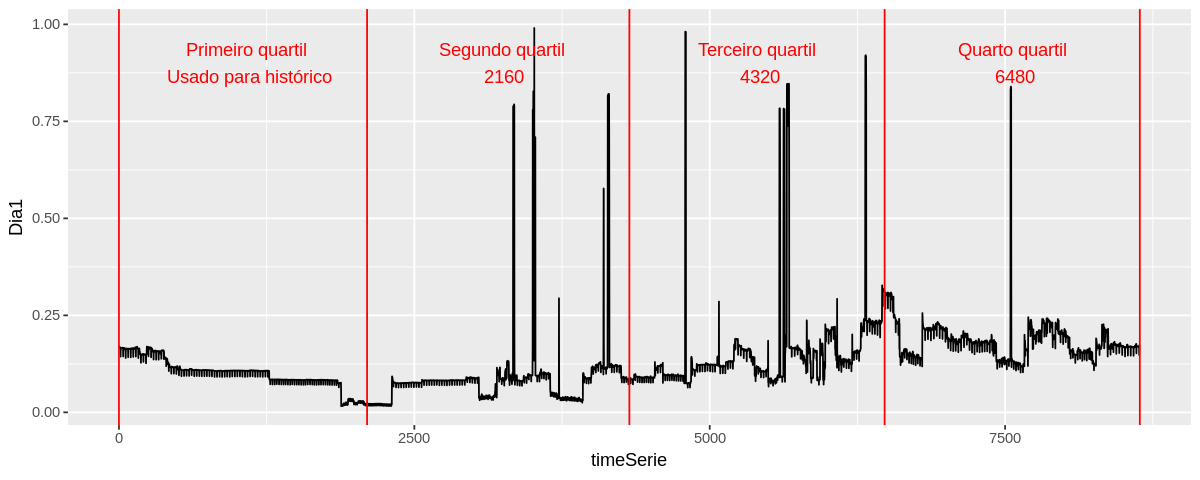

In [86]:
options(repr.plot.width=10, repr.plot.height=4)
tsDia1$timeSerie=seq(1,8640,1)
ggplot(tsDia1, aes(x=timeSerie,y=Dia1))+
geom_line()+ 
geom_vline(xintercept = 0, color="red")+
geom_vline(xintercept = 2100, color="red")+
geom_vline(xintercept = 4320, color="red")+
geom_vline(xintercept = 6480, color="red")+
geom_vline(xintercept = 8640, color="red")+
annotate(geom="text", x=1080, y=0.9, label="Primeiro quartil\n Usado para histórico", color="red")+
annotate(geom="text", x=3240, y=0.9, label="Segundo quartil\n 2160", color="red")+
annotate(geom="text", x=5400, y=0.9, label="Terceiro quartil\n 4320", color="red")+
annotate(geom="text", x=7560, y=0.9, label="Quarto quartil\n 6480", color="red")


O primeiro experimento foi de retirada de 1 a 100 elementos a partir dos pontos citados, com granularidade 1, o segundo de 150 a 2100 com granularidade 50.  
Os experimentos seguem da seguinte forma: 
* na primeira execução do laço, o ponto 2161 era atribuído o valor NA(que é um indicador de dado faltante) depois os algoritmos de imputação de dados eram executados na série temporal e era feita a comparação com a série temporal original com as métricas RMSE, MSE e MAE. 
* Na segunda execução do laço era atribuído NA nos pontos 2161 e 2162, os algoritmos de imputação eram executados e a comparação das séries temporais eram feitas, assim até que chegasse ao ponto 2260, onde o eram atribuídos NA's do ponto 2161 até o ponto 2260. 
* Seguindo o raciocínio desses mesmos passos, eram feitas as insersões de NA's e imputações a partir dos pontos 4320 e 6480. Posteriormente os passos citados acima eram feitos no dia 2, 3 até chegar no dia 30. 
* Após estudos preliminares, decidiu-se aumentar a granularidade de 1 para 50 a partir de lacunas de tamanho 100. Ou seja, no segundo experimento, na primeira iteração do laço eram colocados 150 NA's a partir da posição 2161, assim sucessivamente até chegar ao tamanho máximo da lacuna de 2100.

Os gráficos abaixo mostram uma lacuna de tamanho 100 a partir do ponto 2160, lacuna de tamanho 150 a partir do ponto 2160, 
lacuna de tamanho 1000 a partir do ponto 4320 e de tamanho 2100 a partir do ponto 6480:





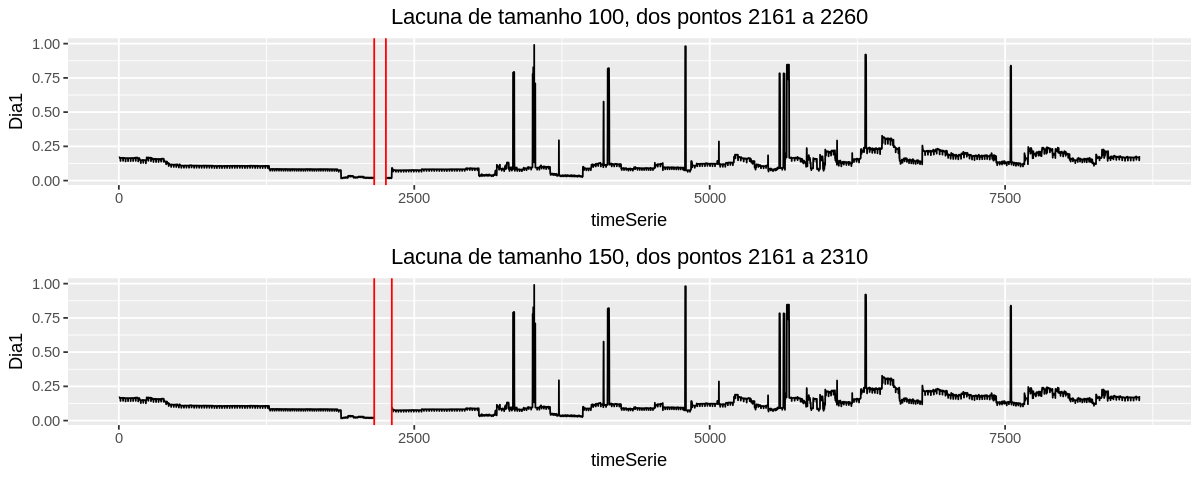

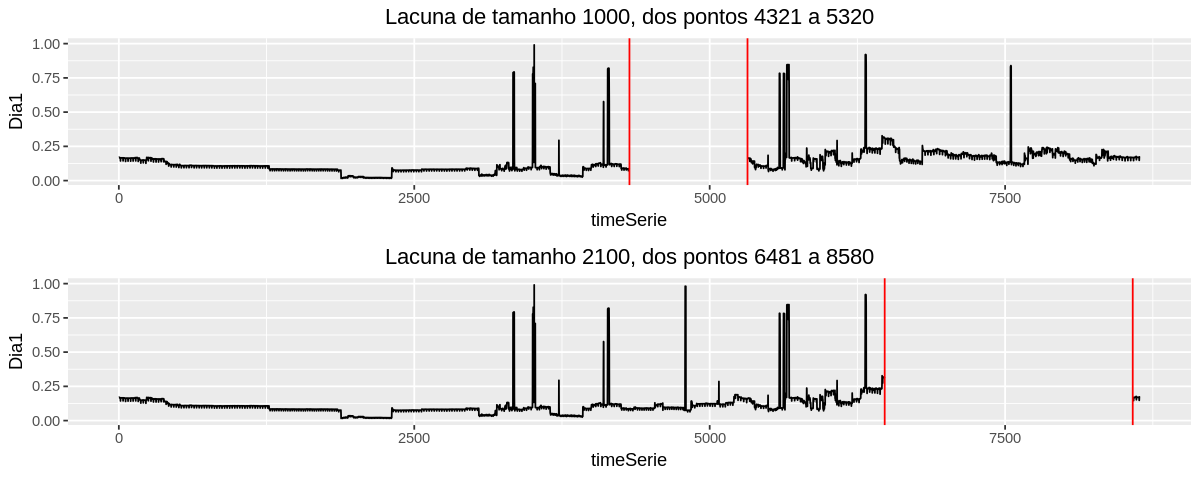

In [95]:
options(repr.plot.width=10, repr.plot.height=4)

aux=tsDia1
aux$Dia1[2161:2260]=NA


p1=ggplot(aux, aes(x=timeSerie,y=Dia1))+
geom_line()+ 
geom_vline(xintercept =2161  , color="red")+
geom_vline(xintercept = 2260 , color="red")+
#geom_rect( xmin = 2161, xmax =2260, ymin = -Inf, ymax = Inf, alpha = 0.01) +
ggtitle("Lacuna de tamanho 100, dos pontos 2161 a 2260")+  theme(plot.title = element_text(hjust = 0.5))

aux=tsDia1
aux$Dia1[2161:2310]=NA
p2=ggplot(aux, aes(x=timeSerie,y=Dia1))+
geom_line()+ 
geom_vline(xintercept = 2161 , color="red")+
geom_vline(xintercept = 2310 , color="red")+
#geom_rect( xmin = 2161, xmax =2310, ymin = -Inf, ymax = Inf, alpha = 0.01) +
ggtitle("Lacuna de tamanho 150, dos pontos 2161 a 2310")+  theme(plot.title = element_text(hjust = 0.5))

aux=tsDia1

aux$Dia1[4321:5320]=NA

p3=ggplot(aux, aes(x=timeSerie,y=Dia1))+
geom_line()+ 
geom_vline(xintercept = 4321, color="red")+
geom_vline(xintercept = 5320, color="red")+
#annotate(geom="text", x=2625, y=0.9, label="", color="red")+
#geom_rect(xmin = 4321, xmax =5320, ymin = -Inf, ymax = Inf, alpha = 0.01) +
ggtitle("Lacuna de tamanho 1000, dos pontos 4321 a 5320")+  theme(plot.title = element_text(hjust = 0.5))

aux=tsDia1
aux$Dia1[6481:8580]=NA

p4=ggplot(aux, aes(x=timeSerie,y=Dia1))+
geom_line()+ 
geom_vline(xintercept = 6481 , color="red")+
geom_vline(xintercept = 8580 , color="red")+
#geom_rect(xmin = 6481, xmax =8580, ymin = -Inf, ymax = Inf, alpha = 0.01) +

ggtitle("Lacuna de tamanho 2100, dos pontos 6481 a 8580")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(p1, p2)
grid.arrange(p3,p4)


Experimento 1
==
Como dito anteriormente, as lacunas foram feitas em três pontos da série temporal. 2160, 4320 e 6480 com granularidade de 1.
* Como os experimentos foram feitos em lugares distintos, os seus resultados precisam ser estudados separadamente. 


Comentários estatístisticos: 
* Como as universos são grandes, investigar todos os elementos populacionais, em geral, necessita muito tempo, o custo é elevado, o processo de investigação leva a destruição do elemento observado.
* Dados quantitativos: quando o resultado da observação é um número, decorrente de um processo de mensuração ou contagem.
* Contínua: resultam de infinitos valores possíveis que correspondem a alguma escala contínua que cobre um intervalo de valores.

Discrição dos dados
----------
A discrição de dados serve para a interpretação dos dados para que sejam tomadas decisões acerca da população usando inferência estattística

Sobre coleta de dados: 
* Amostra: uma contagem ou medição de parte de uma população. As estatísticas produzidas na amostra são usadas para fazer predições sobre vários parâmetros da população.
* Experimento: é aplicado um “tratamento” a uma parte da população e são observadas as respostas.

A técnica de amostragem adotada no experimento 1 e 2 foi a técnica estratificada, que é utilizado quando for importante que uma amostra tenha elementos de cada segmento da população. 

Boxplot
===
Plotagem do boxplot do resultados dos algoritmos estudados. 

Quartis: 

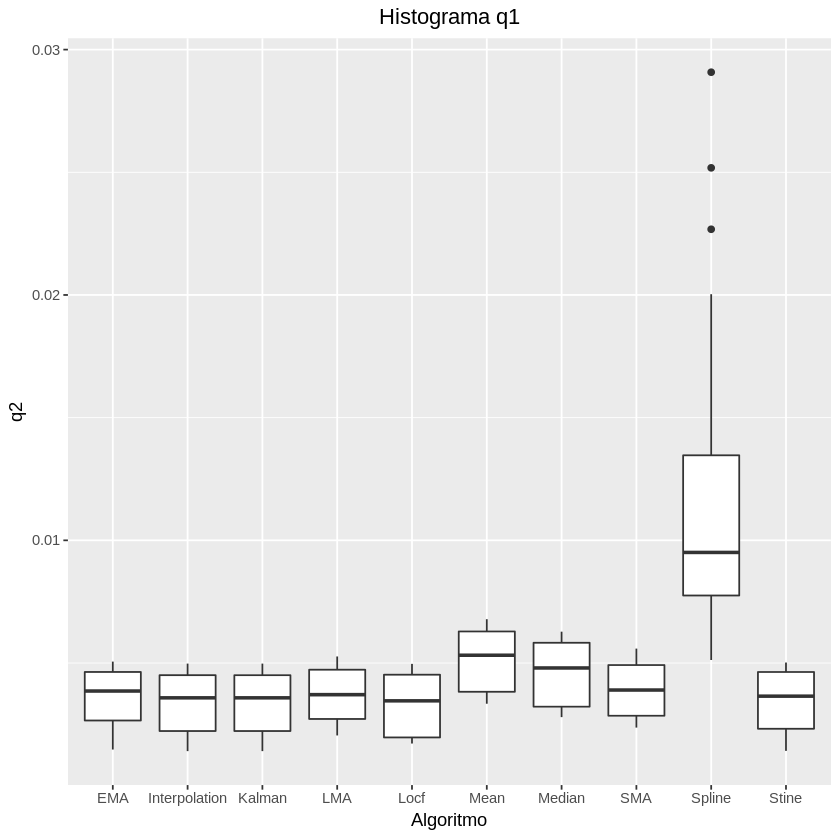

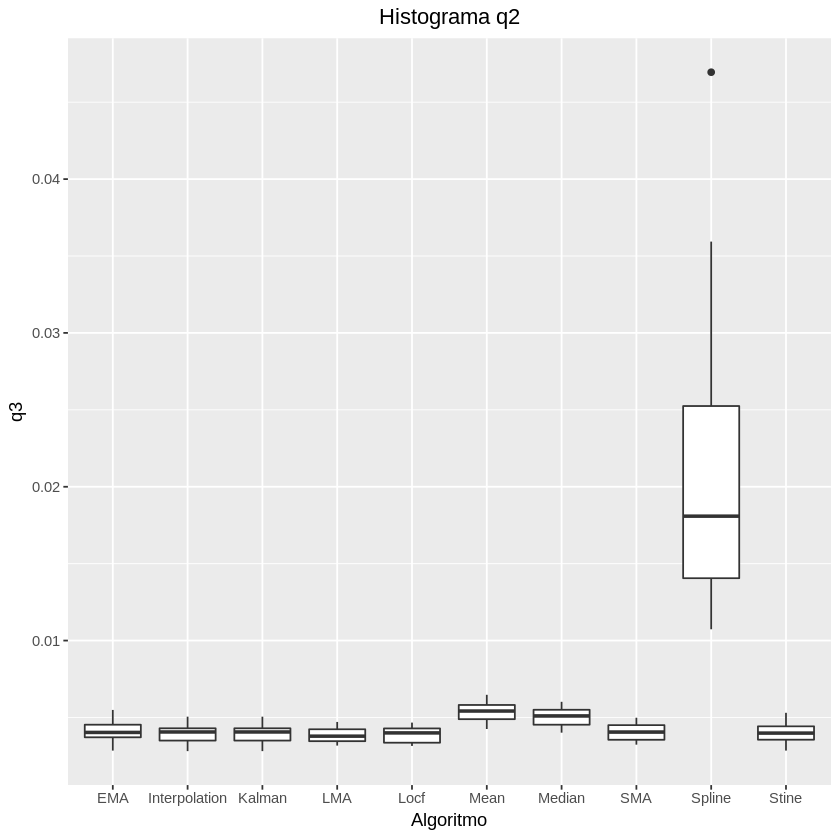

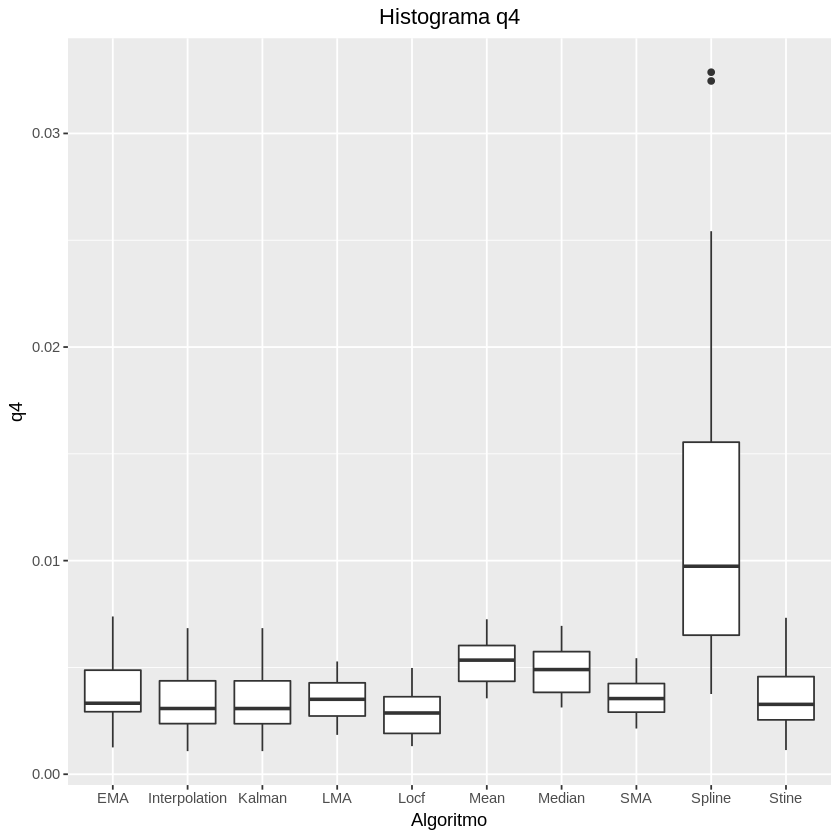

In [8]:
ggplot(todosQuartis, aes(x=Algoritmo, y=q2)) + 
    geom_boxplot()+
#    ylim(min,max) +
    ggtitle("Histograma q1")+  theme(plot.title = element_text(hjust = 0.5))
ggplot(todosQuartis, aes(x=Algoritmo, y=q3)) + 
    geom_boxplot() +
    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))
    
ggplot(todosQuartis, aes(x=Algoritmo, y=q4)) + 
    geom_boxplot() +
    ggtitle("Histograma q4")+  theme(plot.title = element_text(hjust = 0.5))


Media de todos os quartis:

In [13]:
ggplot(todos, aes(x=Algoritmo, y=rmse)) + 
    geom_boxplot()


ERROR: Error in ggplot(todos, aes(x = Algoritmo, y = rmse)): object 'todos' not found


Plotagem do histograma de todos os resultados dos algoritmos em histograma. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


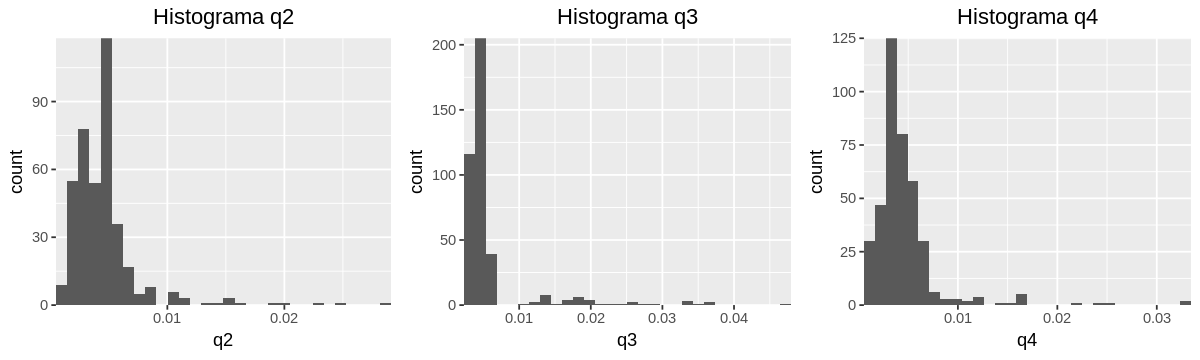

In [10]:
options(repr.plot.width=10, repr.plot.height=3)

#summary(todosQuartis)
plot_q2=ggplot(todosQuartis, aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
   # geom_density() + 

    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))

plot_q3=ggplot(todosQuartis, aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3")+  theme(plot.title = element_text(hjust = 0.5))

plot_q4=ggplot(todosQuartis, aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_q2, plot_q3, plot_q4, ncol=3)


Histograma dos algoritmos
=====
plotagem do histogram de cada algoritmo por cada quartil

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


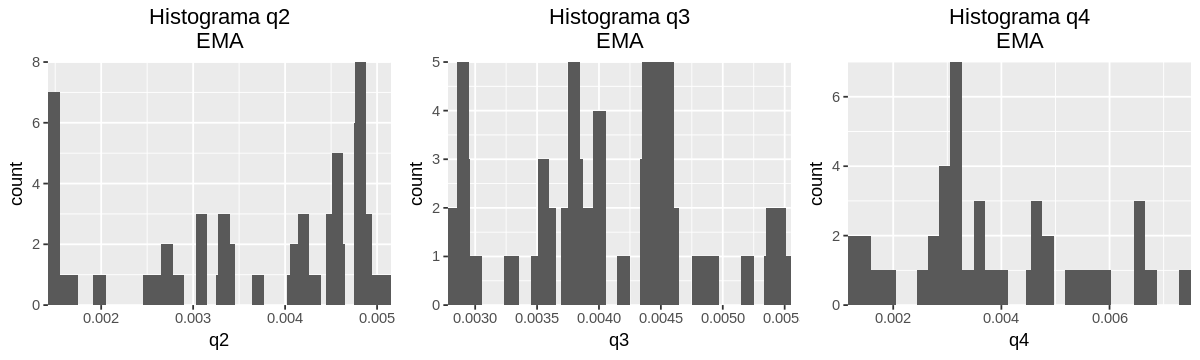

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


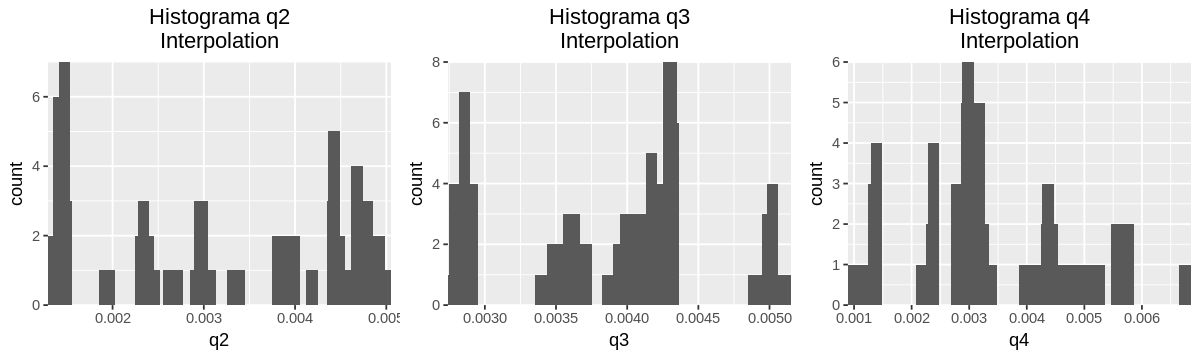

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


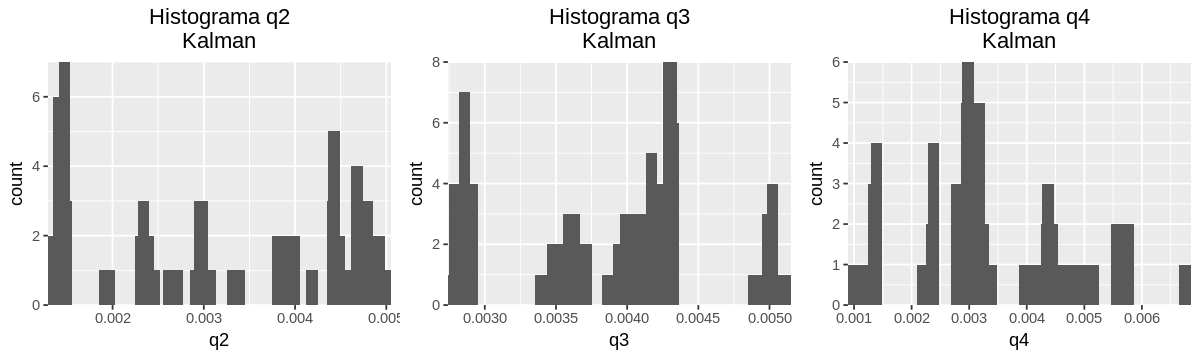

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


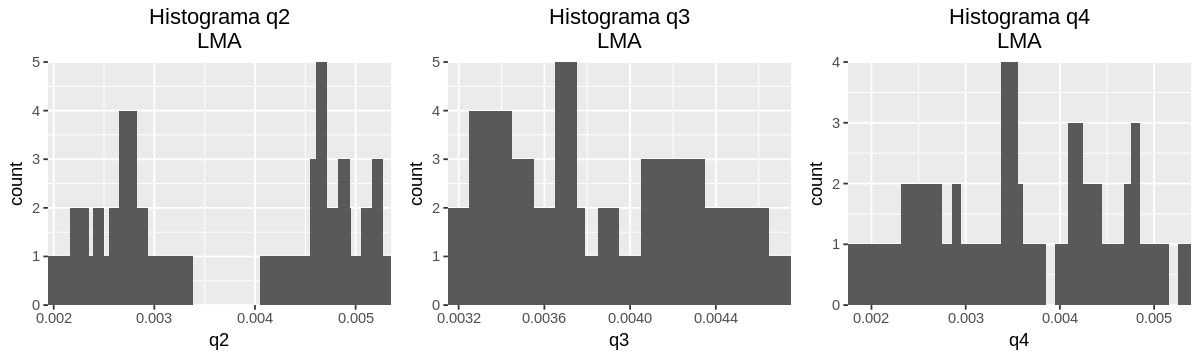

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


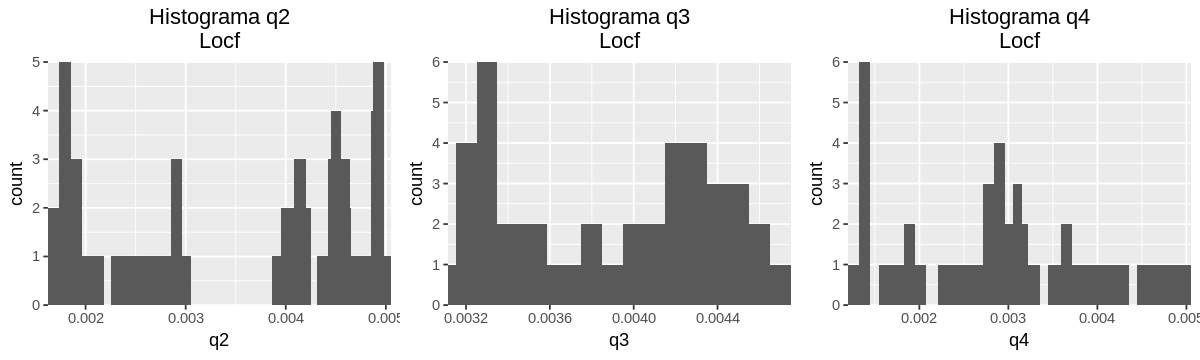

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


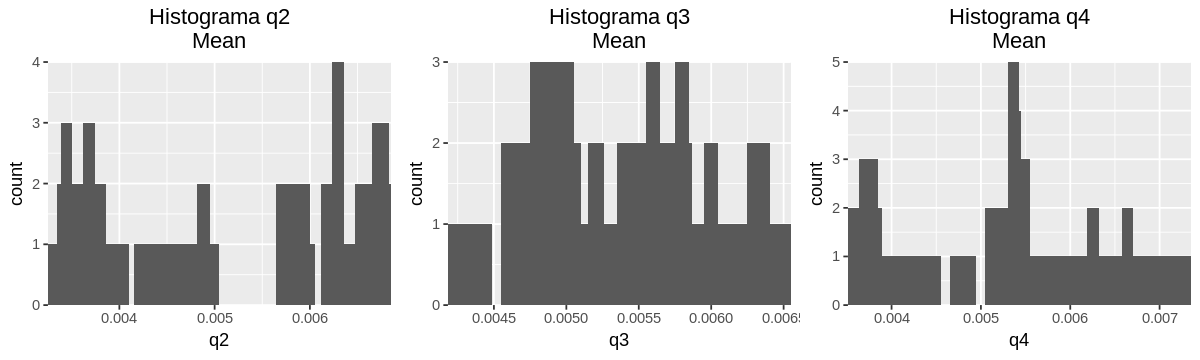

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


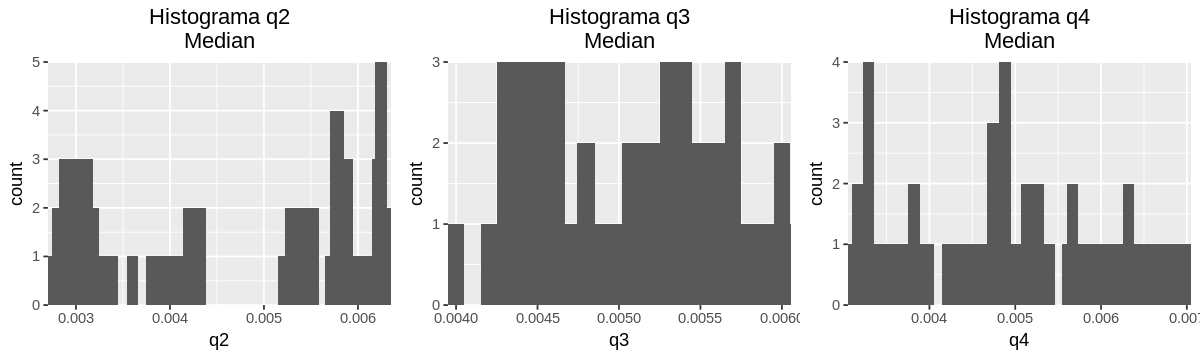

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


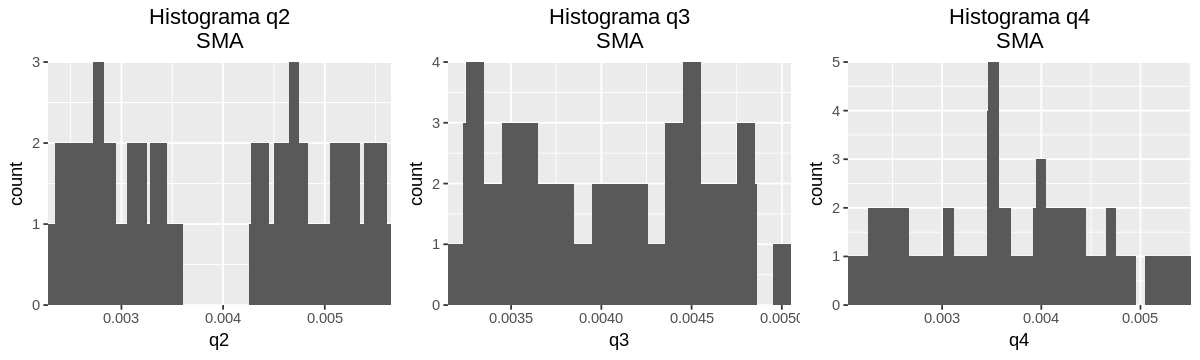

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


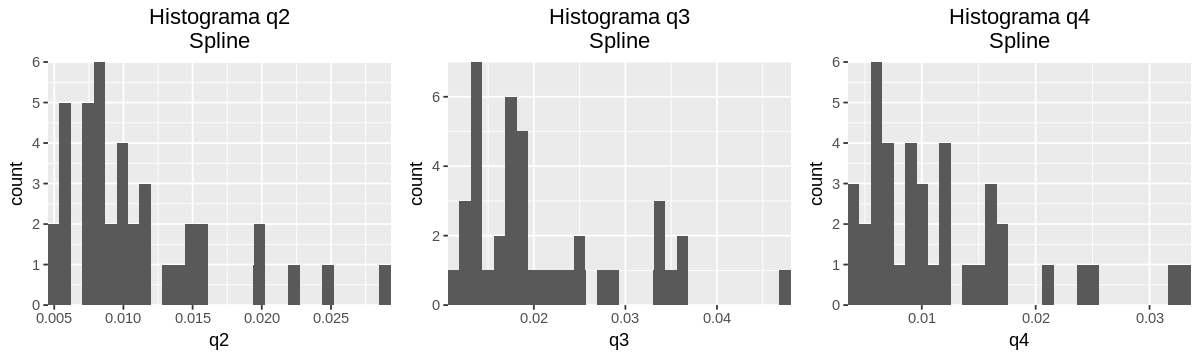

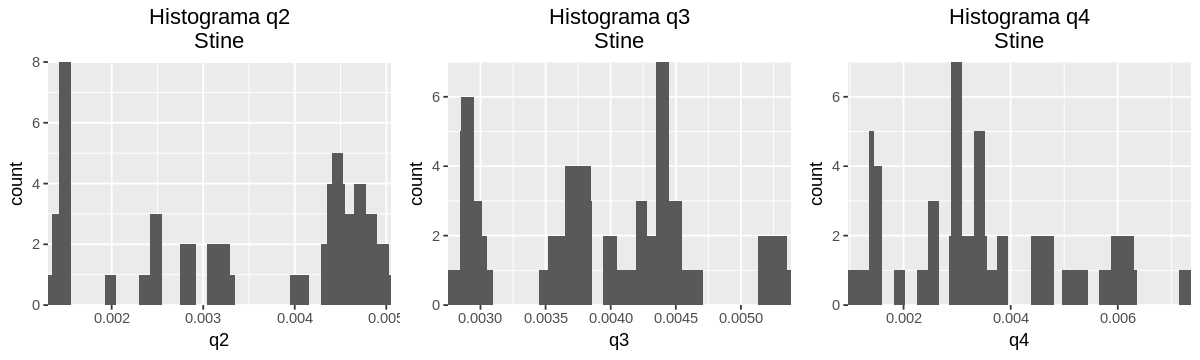

In [11]:
options(repr.plot.width=10, repr.plot.height=3)
#summary(todosQuartis)

plot_EMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_EMAq2, plot_EMAq3, plot_EMAq4, nrow=1, ncol=3)

plot_Interpolationq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Interpolationq2, plot_Interpolationq3, plot_Interpolationq4, nrow=1, ncol=3)

plot_Kalmanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Kalmanq2, plot_Kalmanq3, plot_Kalmanq4, nrow=1, ncol=3)

plot_LMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_LMAq2, plot_LMAq3, plot_LMAq4, nrow=1, ncol=3)

plot_Locfq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Locfq2, plot_Locfq3, plot_Locfq4, nrow=1, ncol=3)

plot_Meanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Meanq2, plot_Meanq3, plot_Meanq4, nrow=1, ncol=3)

plot_Medianq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Medianq2, plot_Medianq3, plot_Medianq4, nrow=1, ncol=3)

plot_SMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_SMAq2, plot_SMAq3, plot_SMAq4, nrow=1, ncol=3)

plot_Splineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Splineq2, plot_Splineq3, plot_Splineq4, nrow=1, ncol=3)

plot_Stineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Stineq2, plot_Stineq3, plot_Stineq4, nrow=1, ncol=3)


Resultados pelos Quartis
===========
Nos gráficos abaixo podem sererm vistos os resultados da imputação de dados dos quartis 2,3 e 4 de 0 a 100
* note que os gráficos estão na mesma escala


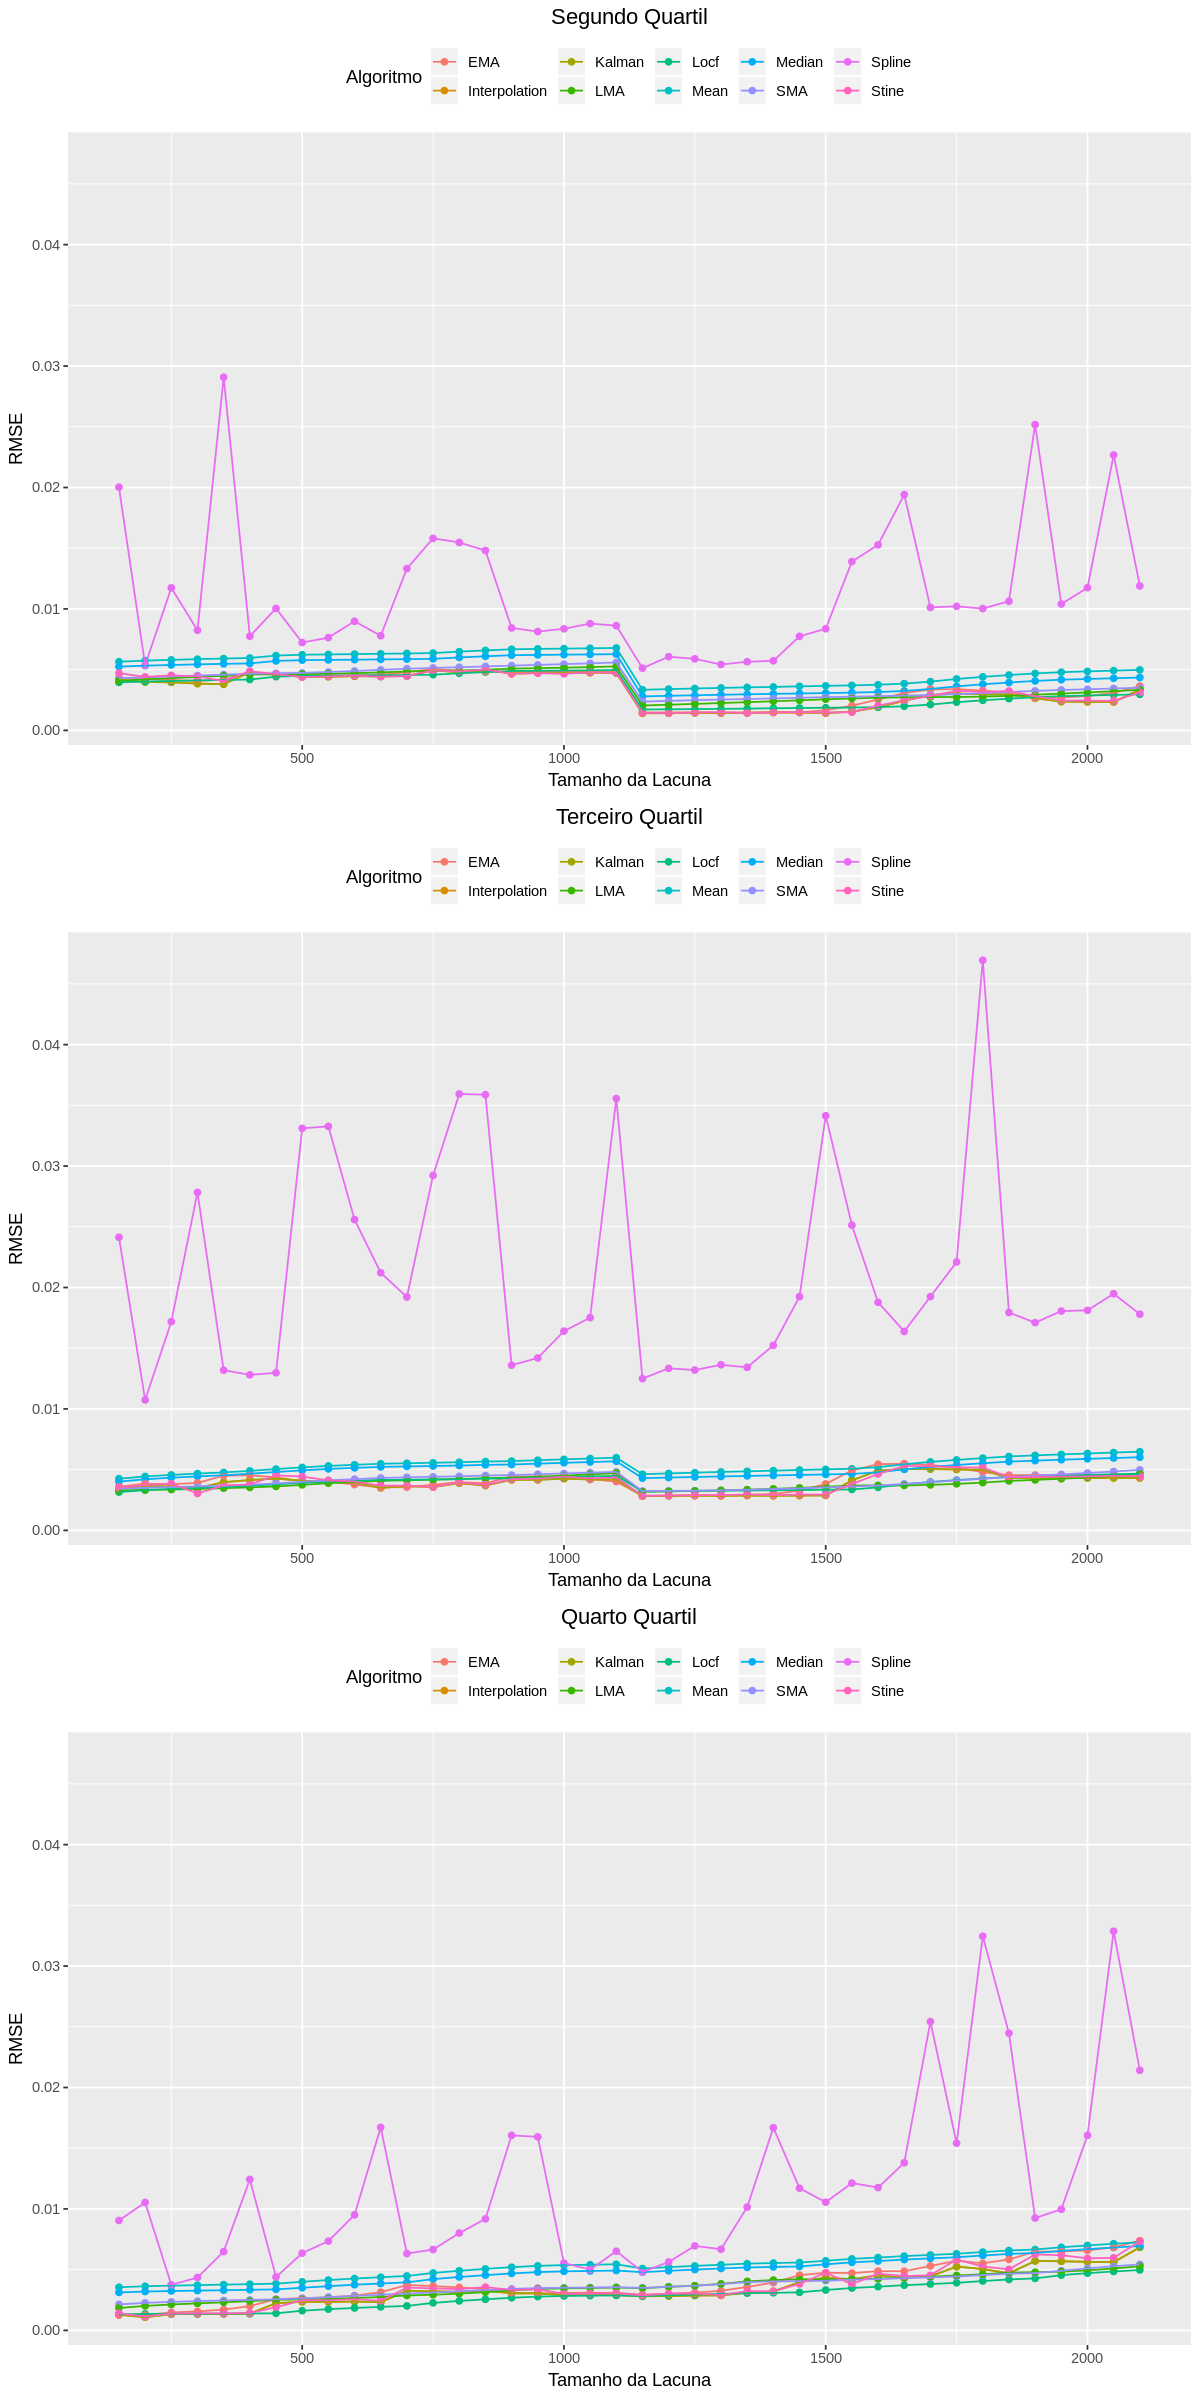

In [12]:
options(repr.plot.width=10, repr.plot.height=20)

min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(todosq2,todosq3,todosq4, nrow=3)





Como pode ser visto, o algoritmo spline ficou muito distante dos demais. Retirando o mesmo da plotagem: 

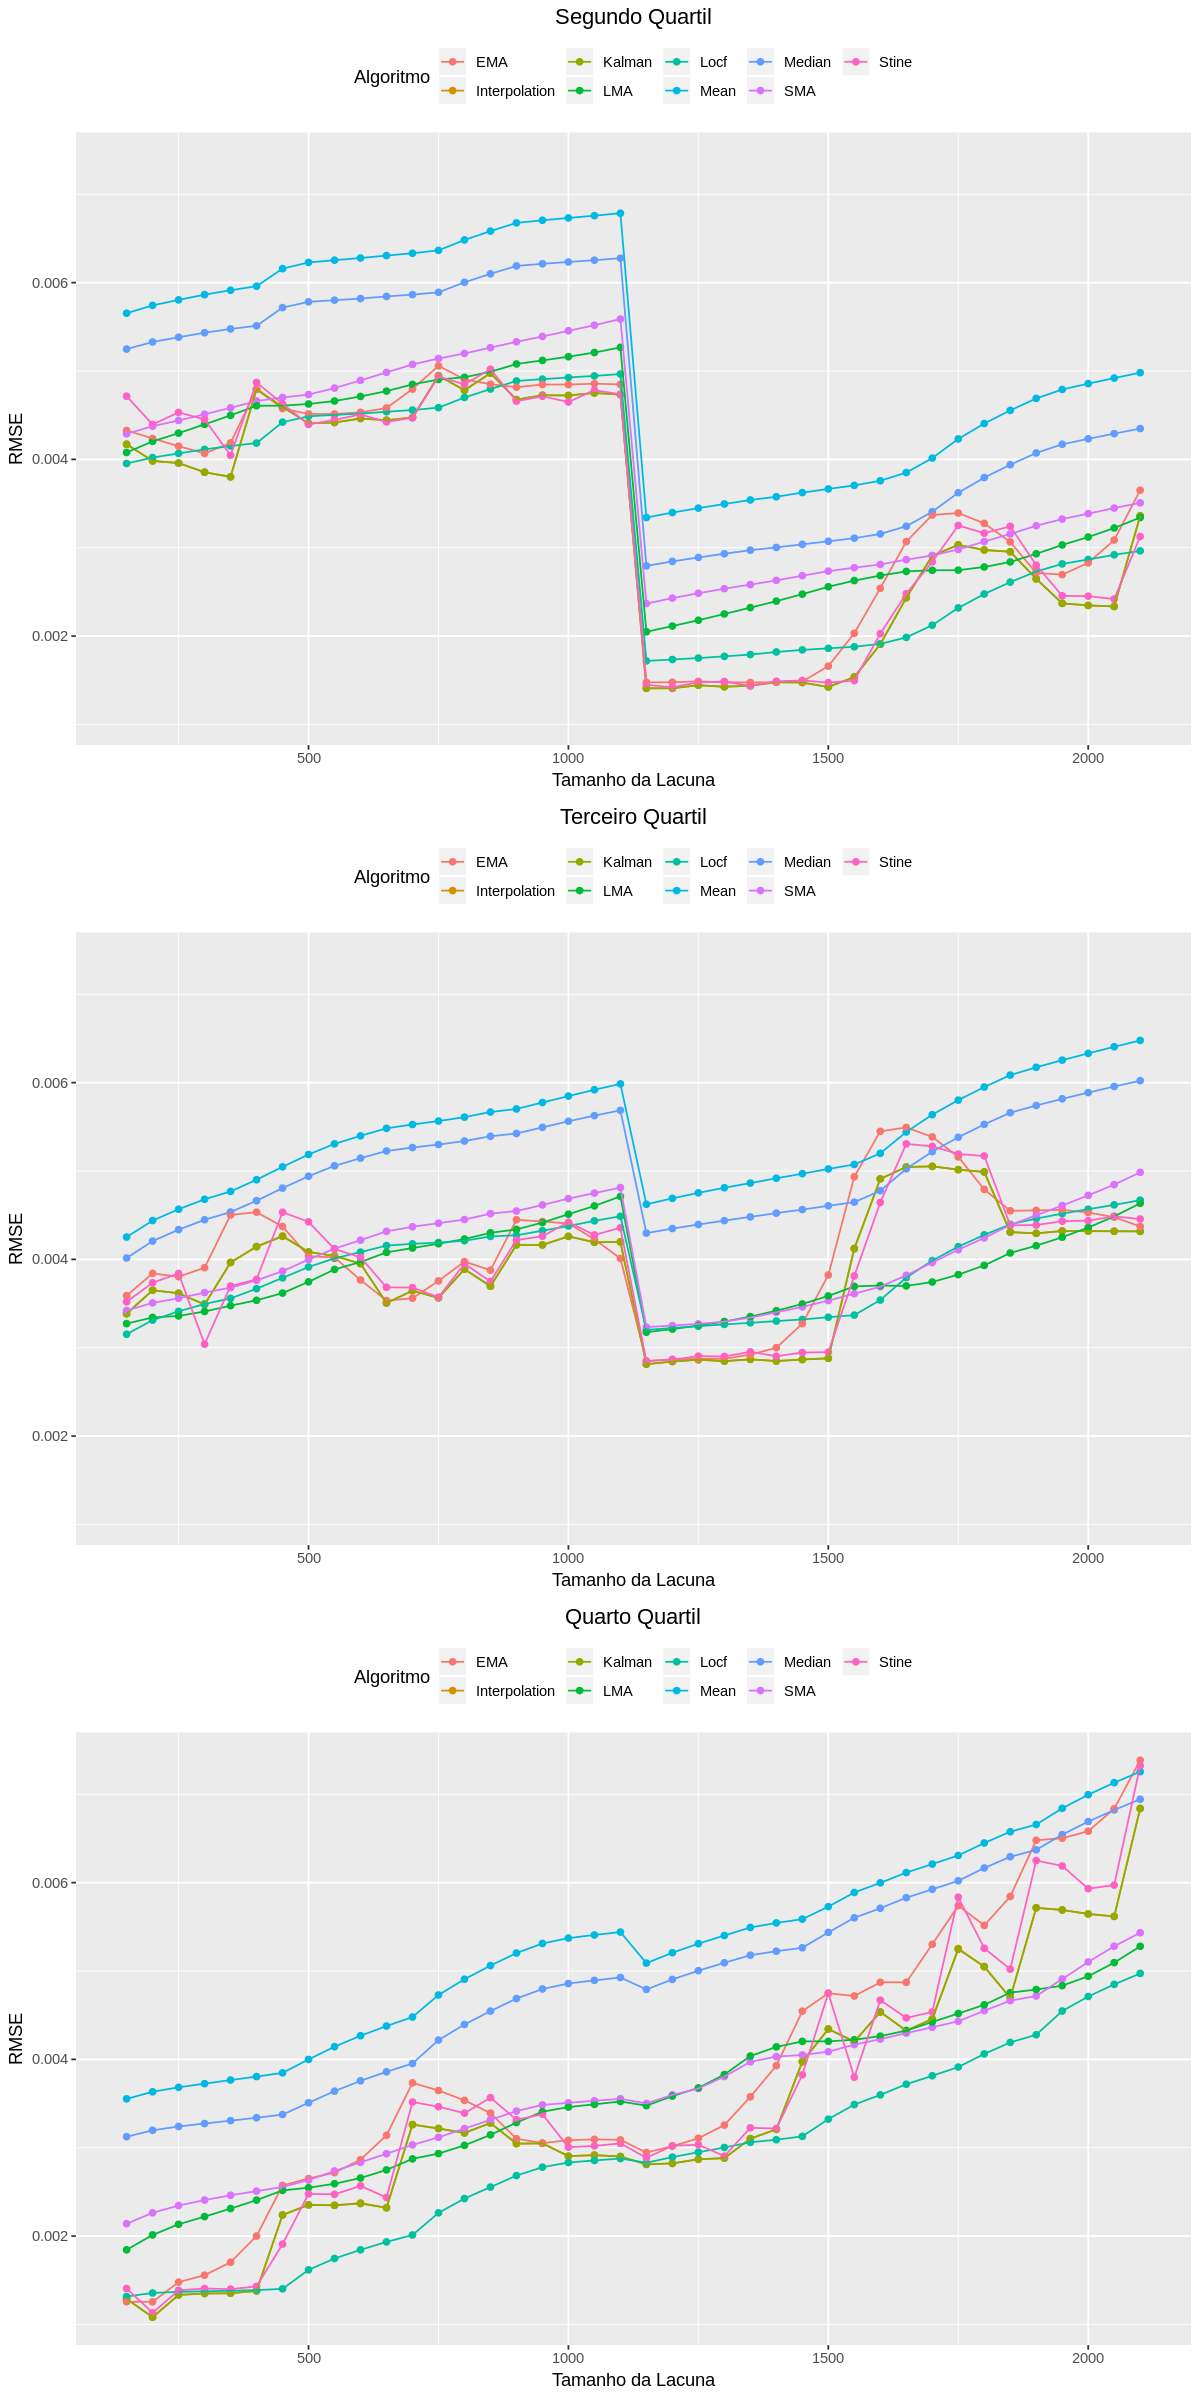

In [14]:
options(repr.plot.width=10, repr.plot.height=20)

todosQuartis=todosQuartis[which(todosQuartis$Algoritmo!="Spline"),]
min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(todosq2,todosq3,todosq4, nrow=3)



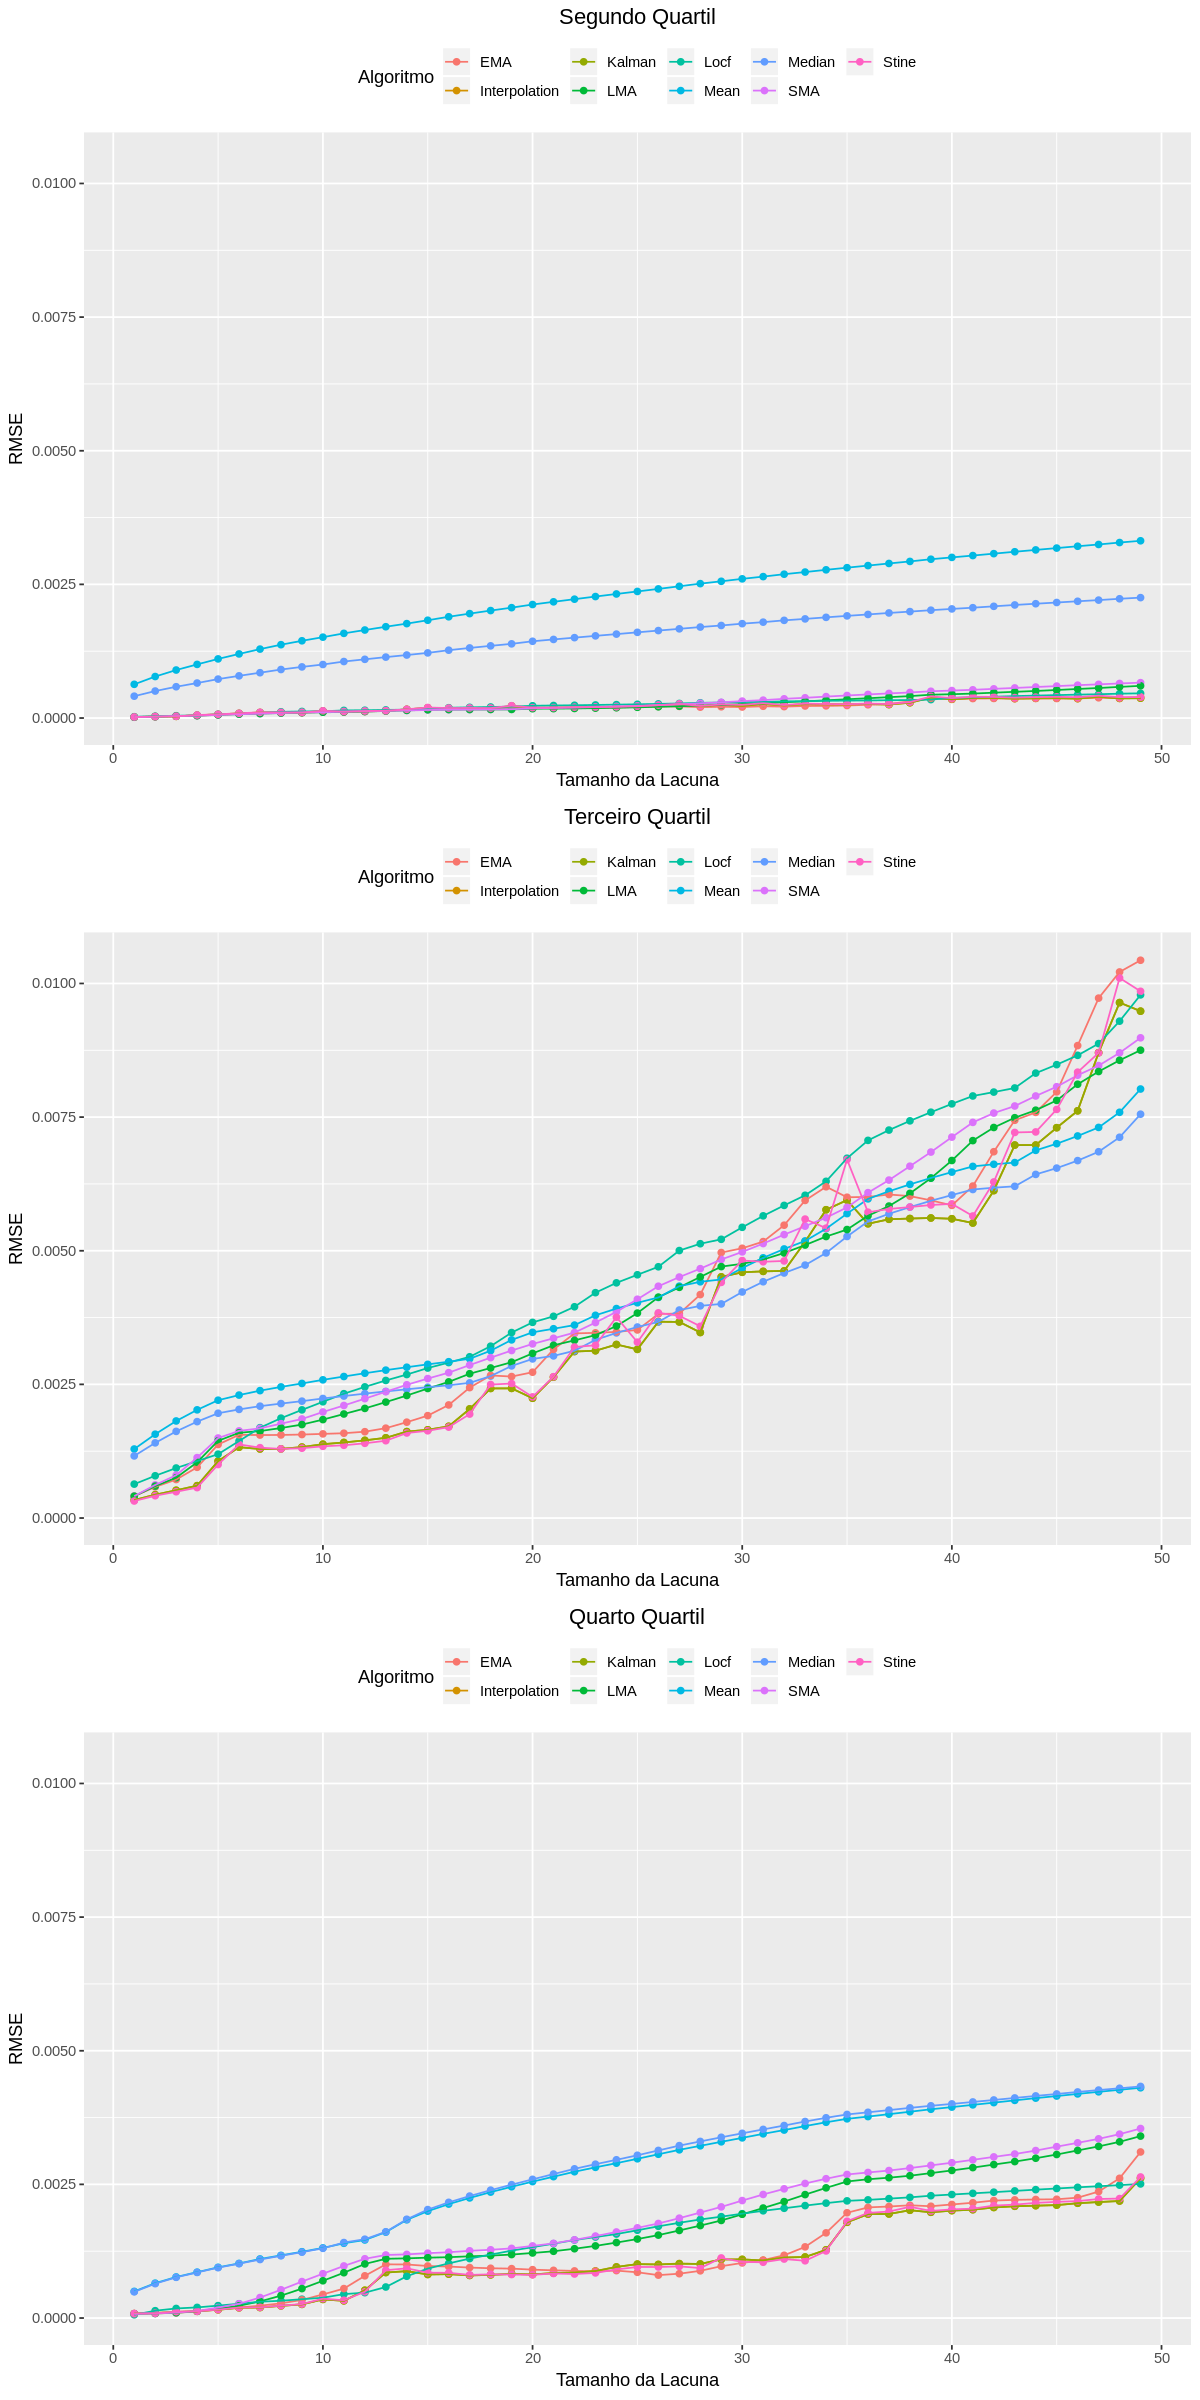

In [38]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho<=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


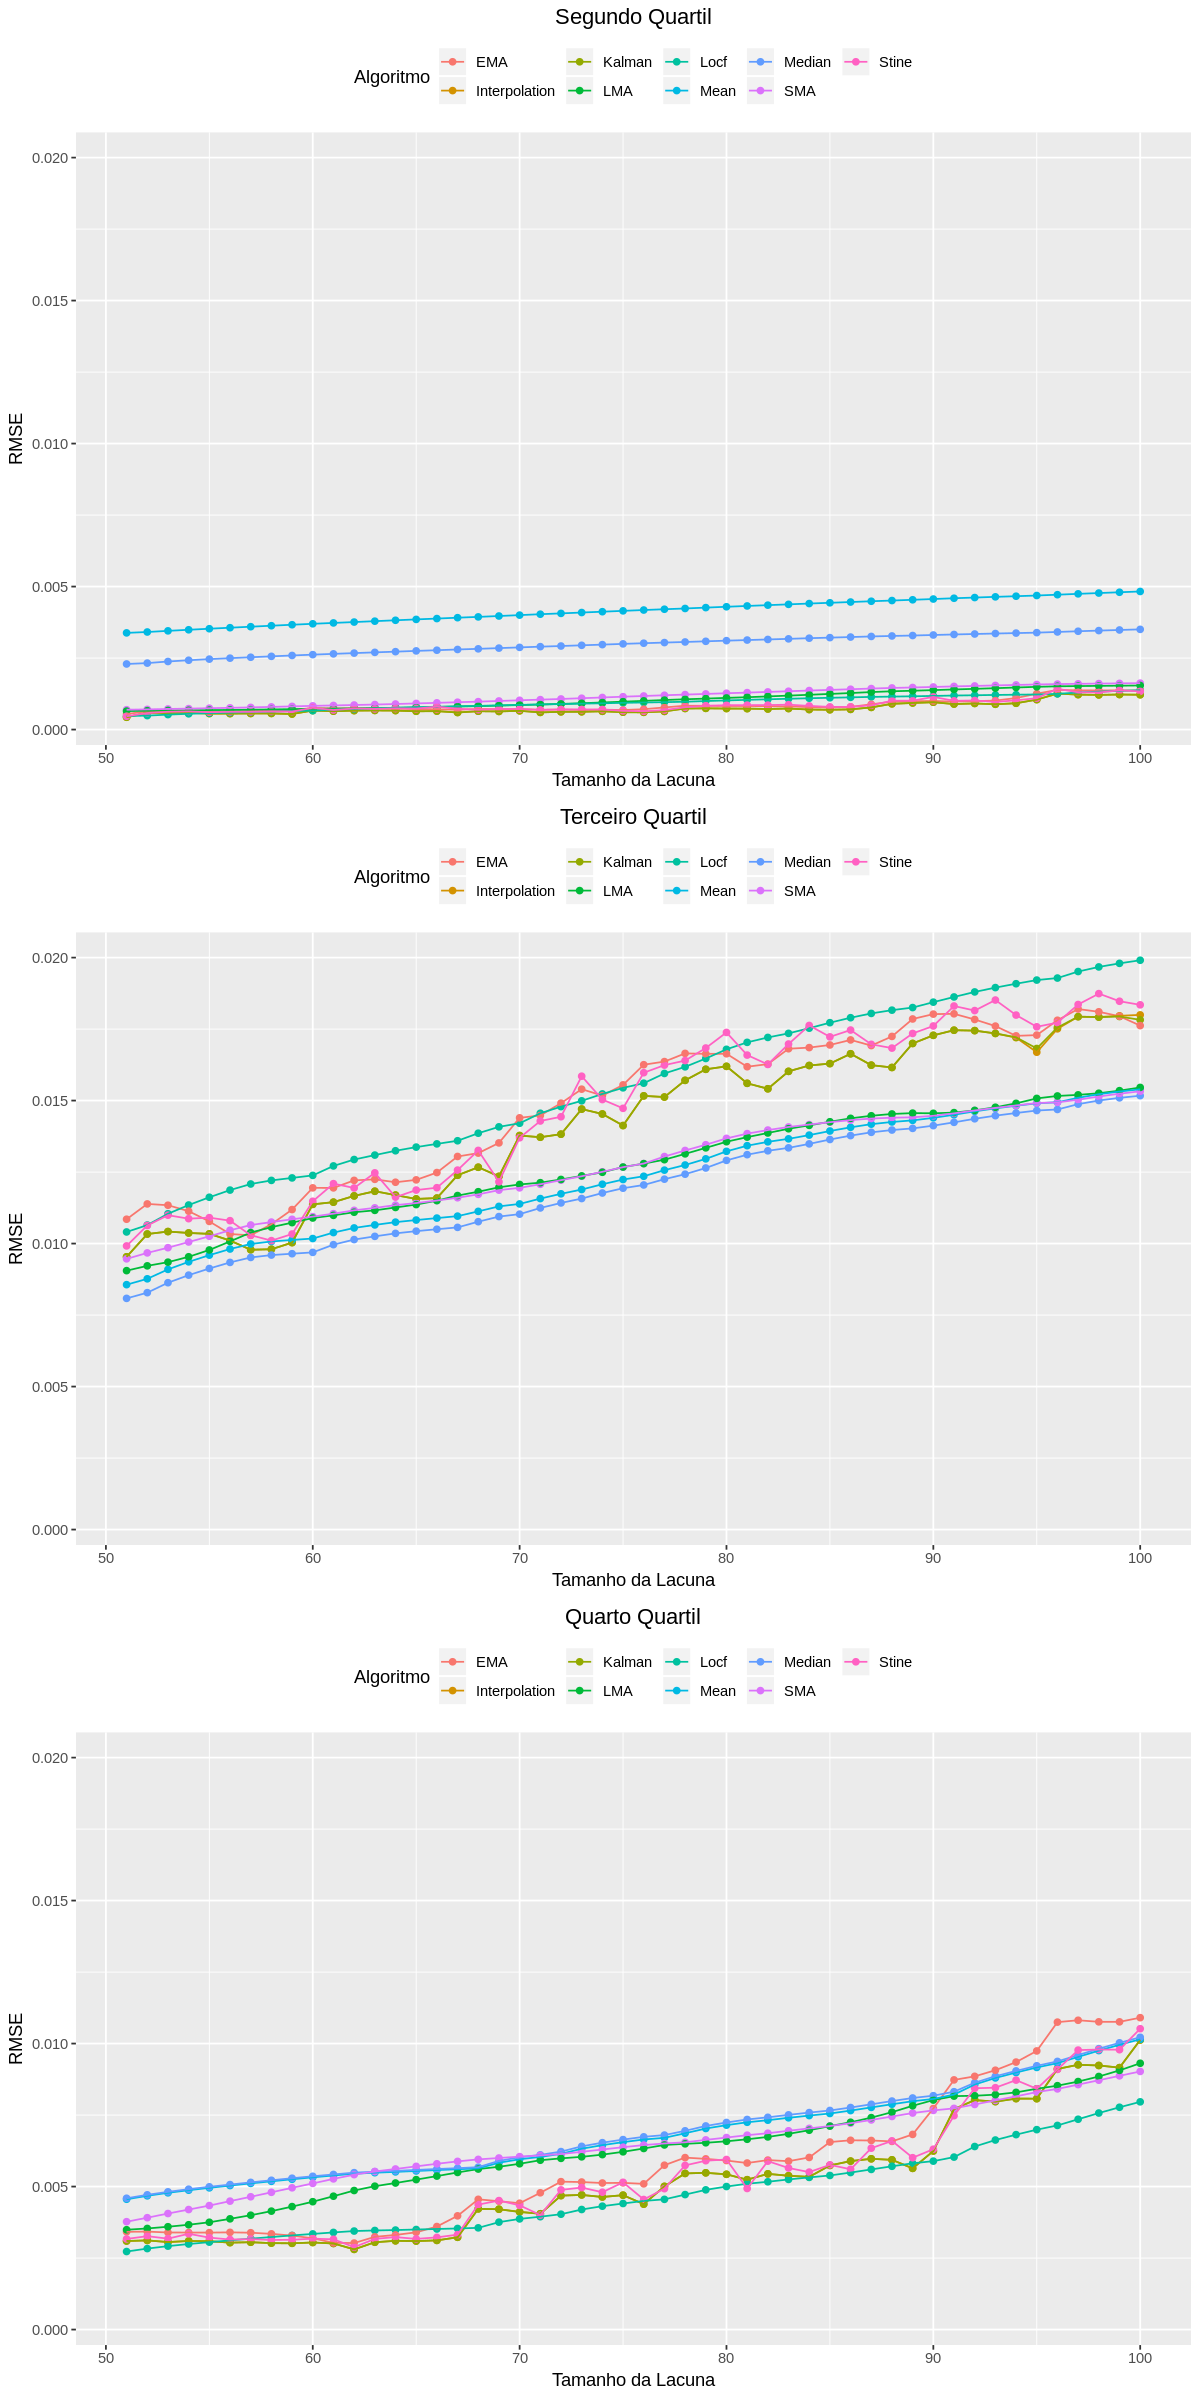

In [40]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho>=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


Percebe-se que no terceiro quartil o valor do RMSE varia-se mais. Pode ser por conta do maior variação do uso de energia no terceiro quarto do dia (Na perte da tarde) 

trecho de código de funções de tratamento

In [42]:
#função para auxilio
func <- function(i){
    ob=c(i,i+100,i+200)
    return(ob)
}

#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLac <- function(data_vector, metrica, type){
    tst=data_vector %>% select(metrica)
    mediaLac=c()
    media=c()
    for(z in seq(1,100,1)){
        for (i in seq(z,9000,300)){
            a=(func(i))
            if(type==1){ 
                mediaLac=append(mediaLac,(mean(tst[a,])))
            } else if(type==2){
                mediaLac=append(mediaLac,(sd(tst[a,])))
            }else if(type==3){
                mediaLac=append(mediaLac,(var(tst[a,])))
            }
        }
    }
    for (i in seq(1,3000,30)) {
    #calculando a média
        if(type==1){ 
            media=append(media,(mean(mediaLac[i:(i+29)])))
        } else if(type==2){
            media=append(media,(sd(mediaLac[i:(i+29)])))
        }else if(type==3){
            media=append(media,(var(mediaLac[i:(i+29)])))
        }
    }    
    return (media)
}

Trecho de código de cálculo das médias

In [45]:
mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

mediaInter=as.data.frame(mediaLac(inter,"rmse", 1))
names(mediaInter)=c("rmse")
mediaInter$mse=mediaLac(inter,"mse", 1)
mediaInter$mae=(mediaLac(inter,"mae", 1))
mediaInter$tamanho=tamanhoGap
mediaInter$sdRmse=mediaLac(inter, "rmse", 2)
mediaInter$varRmse=mediaLac(inter, "rmse", 3)
mediaInter$sdMse=mediaLac(inter, "mse", 2)
mediaInter$varMse=mediaLac(inter, "mse", 3)
mediaInter$sdMae=mediaLac(inter, "mae", 2)
mediaInter$varMae=mediaLac(inter, "mae", 3)
mediaInter$Algoritmo="Interpolation"

mediaKal=as.data.frame(mediaLac(kalman,"rmse", 1))
names(mediaKal)=c("rmse")
mediaKal$mse=mediaLac(kalman,"mse", 1)
mediaKal$mae=(mediaLac(kalman,"mae", 1))
mediaKal$tamanho=tamanhoGap
mediaKal$sdRmse=mediaLac(kalman, "rmse", 2)
mediaKal$varRmse=mediaLac(kalman, "rmse", 3)
mediaKal$sdMse=mediaLac(kalman, "mse", 2)
mediaKal$varMse=mediaLac(kalman, "mse", 3)
mediaKal$sdMae=mediaLac(kalman, "mae", 2)
mediaKal$varMae=mediaLac(kalman, "mae", 3)
mediaKal$Algoritmo="Kalman"

mediaLocf=as.data.frame(mediaLac(locf,"rmse", 1))
names(mediaLocf)=c("rmse")
mediaLocf$mse=mediaLac(locf,"mse", 1)
mediaLocf$mae=(mediaLac(locf,"mae", 1))
mediaLocf$tamanho=tamanhoGap
mediaLocf$sdRmse=mediaLac(locf, "rmse", 2)
mediaLocf$varRmse=mediaLac(locf, "rmse", 3)
mediaLocf$sdMse=mediaLac(locf, "mse", 2)
mediaLocf$varMse=mediaLac(locf, "mse", 3)
mediaLocf$sdMae=mediaLac(locf, "mae", 2)
mediaLocf$varMae=mediaLac(locf, "mae", 3)
mediaLocf$Algoritmo="Locf"

mediaMean=as.data.frame(mediaLac(mean,"rmse", 1))
names(mediaMean)=c("rmse")
mediaMean$mse=mediaLac(mean,"mse", 1)
mediaMean$mae=(mediaLac(mean,"mae", 1))
mediaMean$tamanho=tamanhoGap
mediaMean$sdRmse=mediaLac(mean, "rmse", 2)
mediaMean$varRmse=mediaLac(mean, "rmse", 3)
mediaMean$sdMse=mediaLac(mean, "mse", 2)
mediaMean$varMse=mediaLac(mean, "mse", 3)
mediaMean$sdMae=mediaLac(mean, "mae", 2)
mediaMean$varMae=mediaLac(mean, "mae", 3)
mediaMean$Algoritmo="Mean"

mediaMedian=as.data.frame(mediaLac(median,"rmse", 1))
names(mediaMedian)=c("rmse")
mediaMedian$mse=mediaLac(median,"mse", 1)
mediaMedian$mae=(mediaLac(median,"mae", 1))
mediaMedian$tamanho=tamanhoGap
mediaMedian$sdRmse=mediaLac(median, "rmse", 2)
mediaMedian$varRmse=mediaLac(median, "rmse", 3)
mediaMedian$sdMse=mediaLac(median, "mse", 2)
mediaMedian$varMse=mediaLac(median, "mse", 3)
mediaMedian$sdMae=mediaLac(median, "mae", 2)
mediaMedian$varMae=mediaLac(median, "mae", 3)
mediaMedian$Algoritmo="Median"

mediaMalExp=as.data.frame(mediaLac(malExp,"rmse", 1))
names(mediaMalExp)=c("rmse")
mediaMalExp$mse=mediaLac(malExp,"mse", 1)
mediaMalExp$mae=(mediaLac(malExp,"mae", 1))
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$sdRmse=mediaLac(malExp, "rmse", 2)
mediaMalExp$varRmse=mediaLac(malExp, "rmse", 3)
mediaMalExp$sdMse=mediaLac(malExp, "mse", 2)
mediaMalExp$varMse=mediaLac(malExp, "mse", 3)
mediaMalExp$sdMae=mediaLac(malExp, "mae", 2)
mediaMalExp$varMae=mediaLac(malExp, "mae", 3)
mediaMalExp$Algoritmo="EMA"

mediaMalLin=as.data.frame(mediaLac(malLin,"rmse", 1))
names(mediaMalLin)=c("rmse")
mediaMalLin$mse=mediaLac(malLin,"mse", 1)
mediaMalLin$mae=(mediaLac(malLin,"mae", 1))
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$sdRmse=mediaLac(malLin, "rmse", 2)
mediaMalLin$varRmse=mediaLac(malLin, "rmse", 3)
mediaMalLin$sdMse=mediaLac(malLin, "mse", 2)
mediaMalLin$varMse=mediaLac(malLin, "mse", 3)
mediaMalLin$sdMae=mediaLac(malLin, "mae", 2)
mediaMalLin$varMae=mediaLac(malLin, "mae", 3)
mediaMalLin$Algoritmo="LMA"

mediaMalSim=as.data.frame(mediaLac(malSim,"rmse", 1))
names(mediaMalSim)=c("rmse")
mediaMalSim$mse=mediaLac(malSim,"mse", 1)
mediaMalSim$mae=(mediaLac(malSim,"mae", 1))
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$sdRmse=mediaLac(malSim, "rmse", 2)
mediaMalSim$varRmse=mediaLac(malSim, "rmse", 3)
mediaMalSim$sdMse=mediaLac(malSim, "mse", 2)
mediaMalSim$varMse=mediaLac(malSim, "mse", 3)
mediaMalSim$sdMae=mediaLac(malSim, "mae", 2)
mediaMalSim$varMae=mediaLac(malSim, "mae", 3)
mediaMalSim$Algoritmo="SMA"

mediaSpl=as.data.frame(mediaLac(spl,"rmse", 1))
names(mediaSpl)=c("rmse")
mediaSpl$mse=mediaLac(spl,"mse", 1)
mediaSpl$mae=(mediaLac(spl,"mae", 1))
mediaSpl$tamanho=tamanhoGap
mediaSpl$sdRmse=mediaLac(spl, "rmse", 2)
mediaSpl$varRmse=mediaLac(spl, "rmse", 3)
mediaSpl$sdMse=mediaLac(spl, "mse", 2)
mediaSpl$varMse=mediaLac(spl, "mse", 3)
mediaSpl$sdMae=mediaLac(spl, "mae", 2)
mediaSpl$varMae=mediaLac(spl, "mae", 3)
mediaSpl$Algoritmo="Spline"

mediaSti=as.data.frame(mediaLac(sti,"rmse", 1))
names(mediaSti)=c("rmse")
mediaSti$mse=mediaLac(sti,"mse", 1)
mediaSti$mae=(mediaLac(sti,"mae", 1))
mediaSti$tamanho=tamanhoGap
mediaSti$sdRmse=mediaLac(sti, "rmse", 2)
mediaSti$varRmse=mediaLac(sti, "rmse", 3)
mediaSti$sdMse=mediaLac(sti, "mse", 2)
mediaSti$varMse=mediaLac(sti, "mse", 3)
mediaSti$sdMae=mediaLac(sti, "mae", 2)
mediaSti$varMae=mediaLac(sti, "mae", 3)
mediaSti$Algoritmo="Stine"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

In [47]:
head(todos)

rmse,mse,mae,tamanho,sdRmse,varRmse,sdMse,varMse,sdMae,varMae,Algoritmo
0.0001456204,4.350844e-07,2.077160e-06,1,0.0006260773,2.787527e-12,2.906751e-06,1.532208e-21,9.201771e-06,1.309160e-19,Kalman
0.0001859946,7.184584e-07,3.124614e-06,2,0.0008072847,8.093537e-12,4.961386e-06,1.381101e-20,1.418217e-05,7.745025e-19,Kalman
0.0002213076,1.020228e-06,4.154192e-06,3,0.0009626169,1.652266e-11,7.080305e-06,5.896632e-20,1.919458e-05,2.624591e-18,Kalman
0.0002617546,1.326803e-06,5.461034e-06,4,0.0010952876,2.833666e-11,9.265460e-06,1.767888e-19,2.413639e-05,6.734308e-18,Kalman
0.0004284569,3.174029e-06,1.012178e-05,5,0.0016761291,1.020640e-10,1.754716e-05,1.367472e-18,4.226299e-05,4.274831e-17,Kalman
0.0005340816,4.911934e-06,1.337281e-05,6,0.0020760308,2.407361e-10,2.708675e-05,8.415927e-18,5.564604e-05,1.292576e-16,Kalman


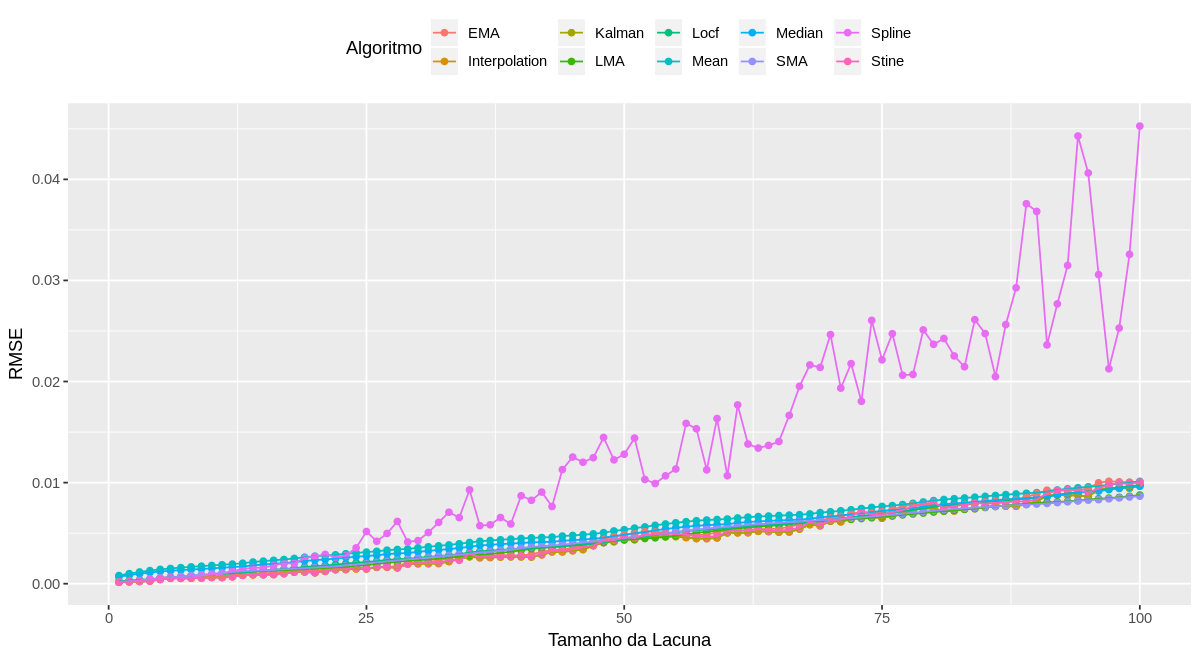

In [51]:
options(repr.plot.width=10, repr.plot.height=5.5)

ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


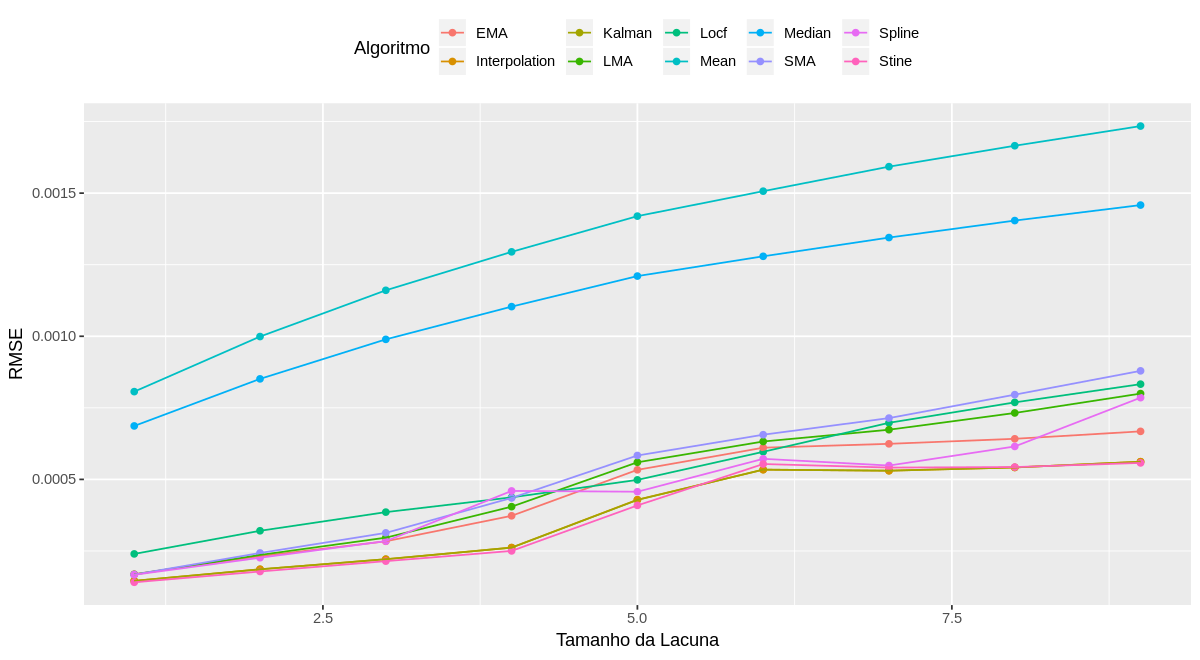

In [52]:
ggplot(todos[which(todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")

In [ ]:
ggplot(todos[which(todos$Algoritmo!= "Locf"  & todos$Algoritmo!= "Mean"  & todos$Algoritmo!= "Median"  &  todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


In [ ]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


In [ ]:
ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho<3000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna") 
    


In [ ]:

ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho>50),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    


In [ ]:
(filter(todos, tamanho==100))

In [ ]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))

by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

In [ ]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a

write.table(a, "min.txt")

In [15]:
#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLacTempo <- function(data_vector){
    tst=data_vector
    mediaLac=c()
    media=c()
    for(z in seq(1,40,1)){
        for (i in seq(z,3600,120)){
            a=(func(i))
            mediaLac=append(mediaLac,(mean(tst[a])))
        }
    }
    for (i in seq(1,1200,30)) {
        #calculando a média
        media=append(media,(mean(mediaLac[i:(i+29)])))
    }    
    return (media)
}

In [16]:
aux=scan("../ESC/1-100/alg.txt", what="complex")
tempo=as.data.frame(scan("../ESC/1-100/tempo.txt"))
names(tempo)=c("tempo")
tempo$Algoritmo=aux


In [17]:

linear_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="linear_interpolation"),1])
spline_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="spline_interpolation"),1])
stine_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="stine_interpolation"),1])
kalmanSmoothing=mediaLacTempo(tempo[which(tempo$Algoritmo=="kalmanSmoothing"),1])
locf=mediaLacTempo(tempo[which(tempo$Algoritmo=="locf"),1])
movingAverage_simple=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_simple"),1])
movingAverage_linear=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_linear"),1])
movingAverage_exponential=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_exponential"),1])
mean=mediaLacTempo(tempo[which(tempo$Algoritmo=="mean"),1])
median=mediaLacTempo(tempo[which(tempo$Algoritmo=="median"),1])
mode=mediaLacTempo(tempo[which(tempo$Algoritmo=="mode"),1])


todosTempo=rbind(linear_interpolation, spline_interpolation, stine_interpolation,kalmanSmoothing,locf,
                movingAverage_simple, movingAverage_linear,movingAverage_exponential, mean, median, mode)


ERROR: Error in func(i): could not find function "func"


In [ ]:
plot(todosTempo[3,])

In [ ]:
ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")